<a href="https://colab.research.google.com/github/irfanizzath/MLPractice/blob/main/Evaluation_Metrics_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import RcParams
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Salary_Data.csv')
pd.set_option('display.max_colwidth',None)
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


<Axes: >

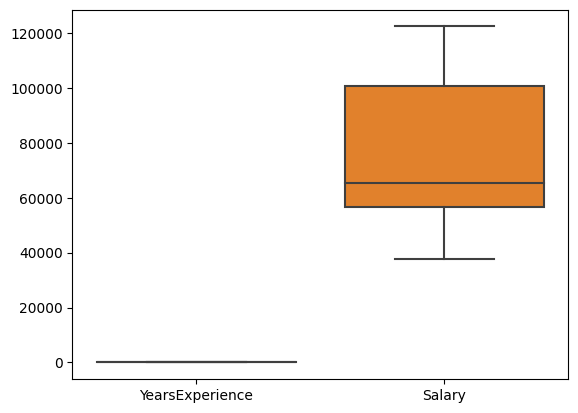

In [ ]:
sns.boxplot(df)
#No outliers

In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

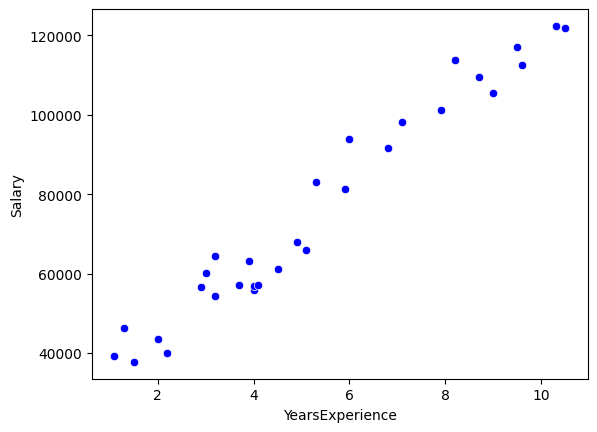

In [ ]:
sns.scatterplot(data = df , x = 'YearsExperience', y = 'Salary', color = 'blue')
pl.show()

<Axes: >

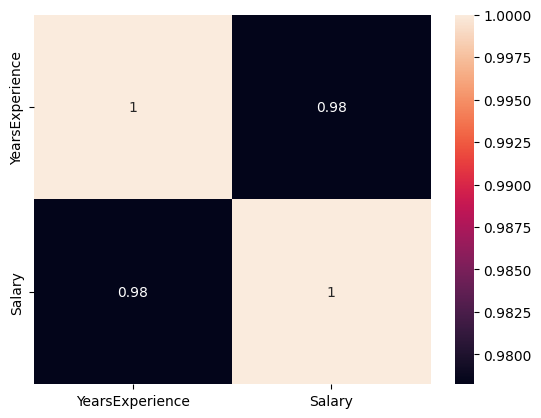

In [ ]:
sns.heatmap(df.corr(), annot = True)

### **X and Y Split**

In [ ]:
Y = df['Salary']
X = pd.DataFrame(df['YearsExperience'])

### **Train test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 3)

In [ ]:
X_train.shape

(24, 1)

In [ ]:
X_test.shape

(6, 1)

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.predict(X_test)

array([ 72348.74519846,  53511.61125108, 100604.44611953, 115674.15327744,
        81767.31217215,  68581.31840899])

In [ ]:
pd.DataFrame({'Actual SaLary': Y_test , 'Predicted SaLary': model.predict(X_test)})

,Actual SaLary,Predicted SaLary
15,67938.0,72348.745198
5,56642.0,53511.611251
22,101302.0,100604.446120
26,116969.0,115674.153277
18,81363.0,81767.312172
14,61111.0,68581.318409


### **Evaluation metrics**

In [ ]:
from sklearn import metrics

In [ ]:
print('r2 Score: ', end= ' ')
print(metrics.r2_score(Y_test,model.predict(X_test)))

r2 Score:  0.9338413473659681


### **Multi Linear Regression**

In [ ]:
df = pd.read_csv('/content/50_Startups.csv')
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB
None


<Axes: >

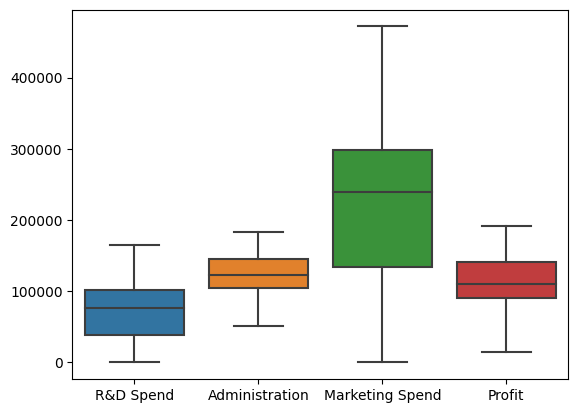

In [ ]:
sns.boxplot(df)

<Axes: xlabel='State', ylabel='Profit'>

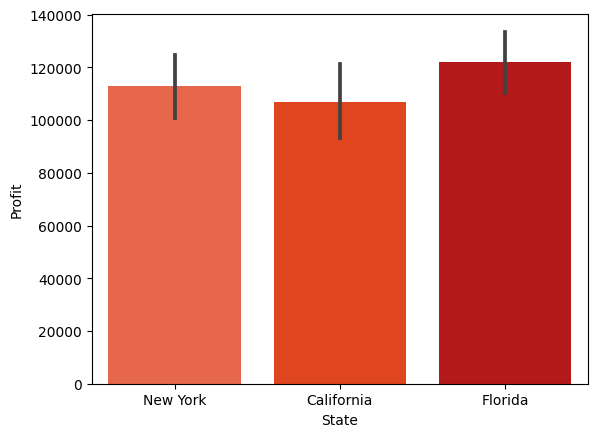

In [ ]:
custom_colors = ["#FF5733", "#FF3300", "#CC0000"]
sns.barplot(x='State', y='Profit', data=df, palette=custom_colors)

<Axes: >

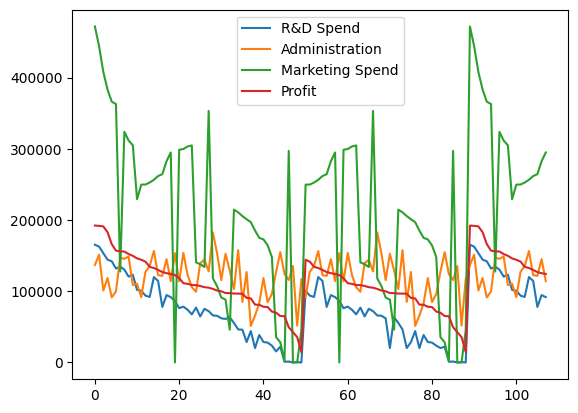

In [ ]:
df.plot()

In [ ]:
df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

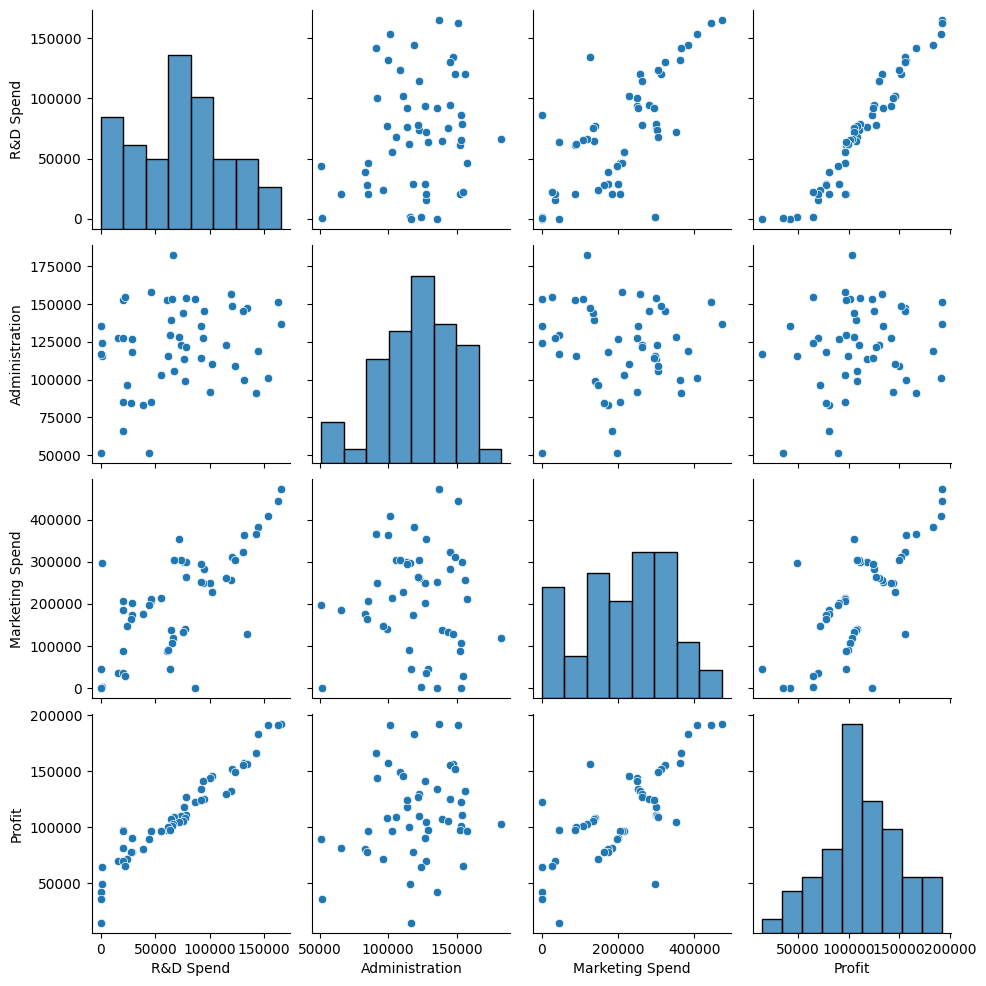

In [ ]:
sns.pairplot(df)

<ipython-input-187-0075e9698cd2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='crest')


<Axes: >

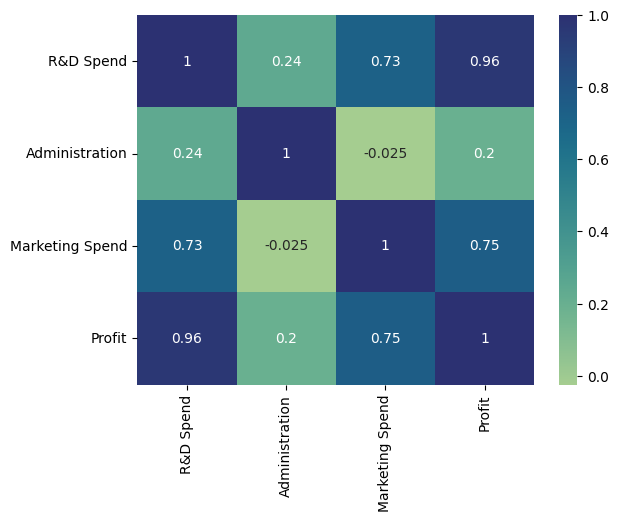

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap='crest')

### **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.State = le.fit_transform(df.State)
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


### **X and Y Split**

In [ ]:
Y = df['Profit']
X = df.drop(columns =['Profit'],axis =1)


### **Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled

,R&D Spend,Administration,Marketing Spend,State
0,2.018191,0.556966,2.187835,1.167315
1,1.956756,1.089397,1.950290,-1.234019
2,1.752320,-0.757668,1.643929,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
4,1.499255,-1.116321,1.288141,-0.033352
...,...,...,...,...
103,1.004384,1.279495,0.354034,-0.033352
104,0.883376,0.031845,0.398870,1.167315
105,0.068183,-0.005635,0.420761,-1.234019
106,0.439806,0.857741,0.576039,1.167315


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 3 )

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_predict = model.predict(X_test)

In [ ]:
pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_predict}).head(5)

,Actual,Predicted
103,132602.65,148772.045896
100,144259.40,133941.366561
6,156122.51,155580.255712
5,156991.12,162833.988610
91,191050.39,180235.760185


### **Evaluation Metrics**

In [ ]:
from sklearn import metrics

In [ ]:
print('r2_Score: ', end= ' ')
print(metrics.r2_score(Y_test, Y_predict))

r2_Score:  0.9338413473659681


In [ ]:
print('mean_squared_error: ', end= ' ')
print(metrics.mean_squared_error(Y_test, Y_predict))

mean_squared_error:  97206229.48167436


In [ ]:
print('root_mean_squared_error: ', end= ' ')
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))

root_mean_squared_error:  9859.321958515928
